In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
import sys

import os

import matplotlib.pyplot as plt 
import japanize_matplotlib
import seaborn as sns

In [2]:
train = pd.read_csv('../train.csv')
test = pd.read_csv('../test.csv')
weather = pd.read_csv('../weather.csv')
alldata = pd.concat([train.copy(), test.copy()], axis = 0)

In [3]:
#データ件数
trainSuv = alldata[:len(train)]
testSuv = alldata[len(train):]
print(len(trainSuv), len(testSuv))

69104 220


# 天候データ作成

In [4]:
area_pairs = alldata['area'].unique()

yasai_areas = set()

for area_pair in area_pairs:
    areas = area_pair.split('_')
    yasai_areas |= set(areas)

yasai_areas

wea_areas = weather['area'].unique()
wea_areas

array(['青森', '盛岡', '秋田', '仙台', '山形', '福島', '水戸', '宇都宮', '前橋', '熊谷', '甲府',
       '横浜', '千葉', '浜松', '長野', '新潟', '名古屋', '高松', '徳島', '高知', '松山', '那覇',
       '鹿児島', '宮崎', '長崎', '熊本', '福岡', '佐賀', '和歌山', '神戸', '帯広', '東京'],
      dtype=object)

In [5]:
area_map = {}

update_area_map = {
    '岩手':'盛岡','宮城':'仙台','静岡':'浜松','沖縄':'那覇','神奈川':'横浜','愛知':'名古屋','茨城':'水戸','北海道':'帯広','各地':'全国',
    '兵庫':'神戸','香川':'高松','埼玉':'熊谷','国内':'全国','山梨':'甲府','栃木':'宇都宮','群馬':'前橋','愛媛':'松山'
}

for yasai_area in yasai_areas:
    if yasai_area not in wea_areas and yasai_area not in update_area_map:
        area_map[yasai_area] = '全国' # 外国の天候は全国にしておく
    else:
        area_map[yasai_area] = yasai_area

area_map = {**area_map, **update_area_map}
area_map

{'トンガ': '全国',
 '岩手': '盛岡',
 '愛知': '名古屋',
 '福島': '福島',
 '神奈川': '横浜',
 '宮城': '仙台',
 '兵庫': '神戸',
 '秋田': '秋田',
 '愛媛': '松山',
 '鹿児島': '鹿児島',
 '熊本': '熊本',
 '新潟': '新潟',
 'カナダ': '全国',
 '高知': '高知',
 '千葉': '千葉',
 '福岡': '福岡',
 '宮崎': '宮崎',
 '茨城': '水戸',
 '中国': '全国',
 '埼玉': '熊谷',
 '香川': '高松',
 '北海道': '帯広',
 '佐賀': '佐賀',
 '徳島': '徳島',
 '青森': '青森',
 '長崎': '長崎',
 '静岡': '浜松',
 '東京': '東京',
 '各地': '全国',
 '群馬': '前橋',
 '栃木': '宇都宮',
 'メキシコ': '全国',
 '和歌山': '和歌山',
 '長野': '長野',
 'ニュージーランド': '全国',
 '沖縄': '那覇',
 'アメリカ': '全国',
 '国内': '全国',
 '山梨': '甲府'}

In [6]:
alldata['area'] = alldata['area'].apply(lambda x: '_'.join([area_map[i] for i in x.split('_')]))
alldata

,kind,date,amount,mode_price,area,year,weekno
0,かぶ,20051107,39319.0,158.0,千葉,2005,45
1,かぶ,20051108,35433.0,158.0,千葉,2005,45
2,かぶ,20051110,40208.0,126.0,千葉,2005,45
3,かぶ,20051111,32032.0,137.0,千葉,2005,45
4,かぶ,20051112,38288.0,137.0,千葉,2005,45
...,...,...,...,...,...,...,...
215,じゃがいも,20230725,NaN,NaN,全国_水戸_浜松,2023,30
216,じゃがいも,20230727,NaN,NaN,全国_水戸_浜松,2023,30
217,じゃがいも,20230728,NaN,NaN,全国_水戸_浜松,2023,30
218,じゃがいも,20230729,NaN,NaN,全国_水戸_浜松,2023,30


In [7]:
weather['year'] = weather['date'].apply(lambda x: int(str(x)[:4]))
weather['month'] = weather['date'].apply(lambda x: int(str(x)[4:6]))
weather

,date,mean_temp,max_temp,max_temp_time,min_temp,min_temp_time,sum_rain,sun_time,mean_humid,area,year,month
0,20041106,13.1,20.1,2004/11/6 12:50,8.1,2004/11/6 05:31,5.0,1.6,77.0,青森,2004,11
1,20041107,9.6,12.5,2004/11/7 13:40,5.4,2004/11/7 22:17,0.0,4.1,63.0,青森,2004,11
2,20041108,9.0,15.5,2004/11/8 12:51,3.2,2004/11/8 06:28,0.0,8.9,72.0,青森,2004,11
3,20041109,12.2,17.7,2004/11/9 14:40,5.7,2004/11/9 02:49,1.5,1.2,85.0,青森,2004,11
4,20041110,11.6,16.4,2004/11/10 14:42,6.9,2004/11/10 06:23,0.0,7.5,89.0,青森,2004,11
...,...,...,...,...,...,...,...,...,...,...,...,...
218107,20230626,26.4,28.6,2023/6/26 16:13,24.4,2023/6/26 09:05,19.0,2.0,81.0,長崎,2023,6
218108,20230627,27.5,30.3,2023/6/27 13:09,26.0,2023/6/27 06:29,0.5,6.4,78.0,長崎,2023,6
218109,20230628,26.8,29.0,2023/6/28 13:34,26.3,2023/6/28 09:07,6.5,0.8,84.0,長崎,2023,6
218110,20230629,27.4,30.4,2023/6/29 14:22,26.0,2023/6/29 06:49,8.0,1.9,83.0,長崎,2023,6


In [8]:
alldata['year'] = alldata['date'].apply(lambda x: int(str(x)[:4]))
alldata['month'] = alldata['date'].apply(lambda x: int(str(x)[4:6]))
alldata

,kind,date,amount,mode_price,area,year,weekno,month
0,かぶ,20051107,39319.0,158.0,千葉,2005,45,11
1,かぶ,20051108,35433.0,158.0,千葉,2005,45,11
2,かぶ,20051110,40208.0,126.0,千葉,2005,45,11
3,かぶ,20051111,32032.0,137.0,千葉,2005,45,11
4,かぶ,20051112,38288.0,137.0,千葉,2005,45,11
...,...,...,...,...,...,...,...,...
215,じゃがいも,20230725,NaN,NaN,全国_水戸_浜松,2023,30,7
216,じゃがいも,20230727,NaN,NaN,全国_水戸_浜松,2023,30,7
217,じゃがいも,20230728,NaN,NaN,全国_水戸_浜松,2023,30,7
218,じゃがいも,20230729,NaN,NaN,全国_水戸_浜松,2023,30,7


In [9]:
agg_cols = ['mean_temp', 'max_temp', 'min_temp', 'sum_rain', 'sun_time', 'mean_humid']
weather_month = weather.groupby(['area', 'year', 'month'])[agg_cols].agg(['mean','max','min']).reset_index()
weather_month.columns
new_cols = []
for col1, col2 in weather_month.columns:
    if col2:
        new_cols.append(col2+'_'+col1)
    else:
        new_cols.append(col1)
weather_month.columns = new_cols

weather_month.size

150528

In [10]:
agg_cols = [i for i in weather_month.columns if i not in ['year', 'month', 'area']]
tmp_df = weather_month.groupby(['year', 'month'])[agg_cols].agg(['mean']).reset_index()

new_cols = []
for col1, col2 in tmp_df.columns:
    new_cols.append(col1)

tmp_df.columns = new_cols
tmp_df['area'] = '全国'
tmp_df = tmp_df[weather_month.columns]
weather_month = pd.concat([weather_month, tmp_df])
weather_month.to_csv('../proccesseddata/weather_month.csv', index=False, encoding='cp932')

In [11]:
target_cols = [i for i in weather_month.columns if i != 'area']
target_cols

['year',
 'month',
 'mean_mean_temp',
 'max_mean_temp',
 'min_mean_temp',
 'mean_max_temp',
 'max_max_temp',
 'min_max_temp',
 'mean_min_temp',
 'max_min_temp',
 'min_min_temp',
 'mean_sum_rain',
 'max_sum_rain',
 'min_sum_rain',
 'mean_sun_time',
 'max_sun_time',
 'min_sun_time',
 'mean_mean_humid',
 'max_mean_humid',
 'min_mean_humid']

In [12]:
# 複数エリアの場合は平均値を採用
area_pair_dfs = []
area_pairs = alldata['area'].unique()

for area_pair in area_pairs:
    areas = area_pair.split('_')
    if len(areas) > 0:
        area = areas[0]
        base_tmp_df = weather_month[weather_month['area'] == area]
        base_tmp_df = base_tmp_df[target_cols].reset_index(drop=True)
        for area in areas[1:]:
            tmp_df = weather_month[weather_month['area'] == area]
            tmp_df = tmp_df[target_cols].reset_index(drop=True)
            base_tmp_df = base_tmp_df.add(tmp_df)
        base_tmp_df /= len(areas)
        base_tmp_df['area'] = area_pair
        area_pair_dfs.append(base_tmp_df)

In [13]:
area_pair_df = pd.concat(area_pair_dfs)
print(area_pair_df.shape)
area_pair_df.head()
area_pair_df.to_csv('./output/area_pair_df.csv', index=False, encoding='cp932')

(44128, 21)


In [14]:
area_pair_df.to_csv('./output/preprocessed_weather.csv', index=False, encoding='cp932')

In [15]:
weather_month = area_pair_df

In [16]:
alldata.head()

,kind,date,amount,mode_price,area,year,weekno,month
0,かぶ,20051107,39319.0,158.0,千葉,2005,45,11
1,かぶ,20051108,35433.0,158.0,千葉,2005,45,11
2,かぶ,20051110,40208.0,126.0,千葉,2005,45,11
3,かぶ,20051111,32032.0,137.0,千葉,2005,45,11
4,かぶ,20051112,38288.0,137.0,千葉,2005,45,11


In [17]:
'''
https://qr.paps.jp/qjlIA
https://nagasaki-noc.ne.jp/python-concat-time-error-invalidindexerror
'''
def add_weather_feat(all_df, nshift):

    mer_wea_df = weather_month.copy()
    mer_wea_df.columns = [f'{i}_{nshift}prev' if i not in ['year','month','area'] else i for i in mer_wea_df.columns]
    mer_wea_df = mer_wea_df.rename(columns={'year':'merge_year','month':'merge_month'})

    data = []

    for year, month in zip(all_df['year'].values, all_df['month'].values):
        month -= nshift
        if month <= 0:
            month += 12
            year -=1
        data.append([year, month])
    tmp_df = pd.DataFrame(data, columns=['merge_year','merge_month'])

    all_df = all_df.reset_index(drop=True) 
    tmp_df = tmp_df.reset_index(drop=True)
    mer_df = pd.concat([all_df, tmp_df],axis=1).reset_index(drop=True)

    mer_df = pd.merge(mer_df, mer_wea_df, on=['merge_year','merge_month','area'], how='left')
    mer_df.drop(['merge_year', 'merge_month'], axis=1, inplace=True)

    return mer_df


mer_df = alldata.copy()
for nshift in [1,2,3,6,9,12]:
    mer_df = add_weather_feat(mer_df, nshift)

print(mer_df.shape)
mer_df.head()

(69324, 116)


,kind,date,amount,mode_price,area,year,weekno,month,mean_mean_temp_1prev,max_mean_temp_1prev,...,min_min_temp_12prev,mean_sum_rain_12prev,max_sum_rain_12prev,min_sum_rain_12prev,mean_sun_time_12prev,max_sun_time_12prev,min_sun_time_12prev,mean_mean_humid_12prev,max_mean_humid_12prev,min_mean_humid_12prev
0,かぶ,20051107,39319.0,158.0,千葉,2005,45,11,18.83871,24.7,...,6.4,5.84,87.0,0.0,5.084,9.5,0.0,71.76,93.0,43.0
1,かぶ,20051108,35433.0,158.0,千葉,2005,45,11,18.83871,24.7,...,6.4,5.84,87.0,0.0,5.084,9.5,0.0,71.76,93.0,43.0
2,かぶ,20051110,40208.0,126.0,千葉,2005,45,11,18.83871,24.7,...,6.4,5.84,87.0,0.0,5.084,9.5,0.0,71.76,93.0,43.0
3,かぶ,20051111,32032.0,137.0,千葉,2005,45,11,18.83871,24.7,...,6.4,5.84,87.0,0.0,5.084,9.5,0.0,71.76,93.0,43.0
4,かぶ,20051112,38288.0,137.0,千葉,2005,45,11,18.83871,24.7,...,6.4,5.84,87.0,0.0,5.084,9.5,0.0,71.76,93.0,43.0


In [18]:
mer_df.to_csv('./output/mer_df.csv', index=False, encoding='cp932')

# モデル作成

In [19]:
test_kinds = test['kind'].unique()

train_for_model = mer_df[:len(train)].copy()
train_for_model = train_for_model[train_for_model['kind'].isin(test_kinds)]
test_for_model = mer_df[len(train):].copy()

train_for_model = train_for_model.drop(['date','amount','area','year','weekno','month'], axis=1)
test_for_model = test_for_model.drop(['date','amount','area','year','weekno','month'], axis=1)

print(len(mer_df), len(train), len(test), len(train_for_model), len(test_for_model))

69324 69104 220 42989 220


In [20]:
train_for_model.head().to_csv('train_for_model.csv', encoding='cp932')
test_for_model.head().to_csv('test_for_model.csv', encoding='cp932')

In [21]:
from sklearn.model_selection import train_test_split
import time
import lightgbm as lgb

# 初投稿時のパラメーター
# params = {
#     'objective': 'regression',
#     'metric': 'rmse',
#     'num_leaves': 42,
#     'max_depth': 7,
#     "feature_fraction": 0.8,
#     'subsample_freq': 1,
#     "bagging_fraction": 0.95,
#     'min_data_in_leaf': 2,
#     'learning_rate': 0.1,
#     "boosting": "gbdt",
#     "lambda_l1": 0.1,
#     "lambda_l2": 10,
#     "verbosity": -1,
#     "random_state": 42,
#     "num_boost_round": 50000,
#     "early_stopping_rounds": 100
# }

params = {
    'objective': 'regression',
    'metric': 'rmse',
    "verbosity": -1,
    "random_state": 42,
    "num_boost_round": 50000,
    "early_stopping_rounds": 100
}

sub = pd.read_csv('../sample_submission.csv')
model_dict = {}
for kind in test_kinds:
    # 学習データ作成
    y_train =  train_for_model[train_for_model['kind'] == kind].copy()['mode_price']
    X_train =  train_for_model[train_for_model['kind'] == kind].copy().drop('mode_price', axis=1)
    X_test = test_for_model.copy()
    
    X_train = X_train.drop(['kind'], axis=1)
    X_test = X_test.drop(['kind', 'mode_price'], axis=1)

    print(kind, len(X_train), len(X_test))
    # stratifyパラメータについて
    # https://kakakakakku.hatenablog.com/entry/2021/11/30/160351
    # random_stateを指定することで同じ分割を行う
    X_train, X_valid, y_train, y_valid = \
        train_test_split(X_train, y_train, test_size=0.3,
                                     random_state=0)
    lgb_train = lgb.Dataset(X_train,y_train)
    lgb_eval  = lgb.Dataset(X_valid,y_valid)
    
    # モデル作成
    model = lgb.train(
        params, 
        lgb_train, 
        valid_sets=[lgb_train,lgb_eval],
        callbacks=[lgb.early_stopping(stopping_rounds=10, 
                                verbose=True), # early_stopping用コールバック関数
                            lgb.log_evaluation(0)]
    )
    model_dict[kind] = model
    # 予測値適用
    y_pred = model.predict(X_test)
    sub[kind+'_pred_mode_price'] = y_pred
    sub.loc[sub['kind'] == kind, 'mode_price'] = sub[kind+'_pred_mode_price']
    


にんじん 4667 220
Training until validation scores don't improve for 10 rounds


C:\Users\s-heya\Anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[89]	training's rmse: 229.835	valid_1's rmse: 284.122
キャベツ 4672 220
Training until validation scores don't improve for 10 rounds


C:\Users\s-heya\Anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[83]	training's rmse: 175.643	valid_1's rmse: 190.768
はくさい 4672 220
Training until validation scores don't improve for 10 rounds


C:\Users\s-heya\Anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[38]	training's rmse: 232.678	valid_1's rmse: 262.187
こまつな 4665 220
Training until validation scores don't improve for 10 rounds


C:\Users\s-heya\Anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[37]	training's rmse: 48.7511	valid_1's rmse: 48.526
ブロッコリー 1710 220
Training until validation scores don't improve for 10 rounds


C:\Users\s-heya\Anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[40]	training's rmse: 249.261	valid_1's rmse: 286.817
きゅうり 4672 220
Training until validation scores don't improve for 10 rounds


C:\Users\s-heya\Anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[29]	training's rmse: 340.895	valid_1's rmse: 376.065
かぼちゃ 3922 220
Training until validation scores don't improve for 10 rounds


C:\Users\s-heya\Anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[59]	training's rmse: 480.263	valid_1's rmse: 541.743
トマト 4672 220
Training until validation scores don't improve for 10 rounds


C:\Users\s-heya\Anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[37]	training's rmse: 226.375	valid_1's rmse: 230.735
ピーマン 4668 220
Training until validation scores don't improve for 10 rounds


C:\Users\s-heya\Anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[60]	training's rmse: 11.8602	valid_1's rmse: 12.5991
じゃがいも 4669 220
Training until validation scores don't improve for 10 rounds


C:\Users\s-heya\Anaconda3\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Early stopping, best iteration is:
[253]	training's rmse: 242.616	valid_1's rmse: 307.927


# 評価

In [22]:
cols = ['kind', '評価値']
df = pd.DataFrame(index=[], columns=cols)

for kind in test_kinds:
    # 学習データ作成
    y_train =  train_for_model[train_for_model['kind'] == kind].copy()['mode_price']
    X_train =  train_for_model[train_for_model['kind'] == kind].copy().drop('mode_price', axis=1)
    X_test = test_for_model.copy()
    
    X_train = X_train.drop(['kind'], axis=1)
    X_test = X_test.drop(['kind', 'mode_price'], axis=1)

    # stratifyパラメータについて
    # https://kakakakakku.hatenablog.com/entry/2021/11/30/160351
    # random_stateを指定することで同じ分割を行う
    X_train, X_valid, y_train, y_valid = \
        train_test_split(X_train, y_train, test_size=0.3,
                                     random_state=1)
    
    # 予測値適用
    y_valid_pred = model_dict[kind].predict(X_valid)
    
    df1 = pd.DataFrame(
        data=[[kind, np.sqrt(np.mean(((y_valid_pred - y_valid) / y_valid)**2))*100]], 
        columns=cols)
    
    df = pd.concat([df, df1])

#     np.sqrt(np.mean(((pred - true) / true)**2))*100
#     print(np.sqrt(np.mean(((y_valid_pred - y_valid) / y_valid)**2))*100)
#     print()

print(df['評価値'].mean())
df

21.598836407750518


,kind,評価値
0,にんじん,18.487337
0,キャベツ,19.104780
0,はくさい,22.215474
0,こまつな,35.642223
0,ブロッコリー,23.298251
0,きゅうり,21.894410
0,かぼちゃ,23.138068
0,トマト,16.499678
0,ピーマン,18.900088
0,じゃがいも,16.808054


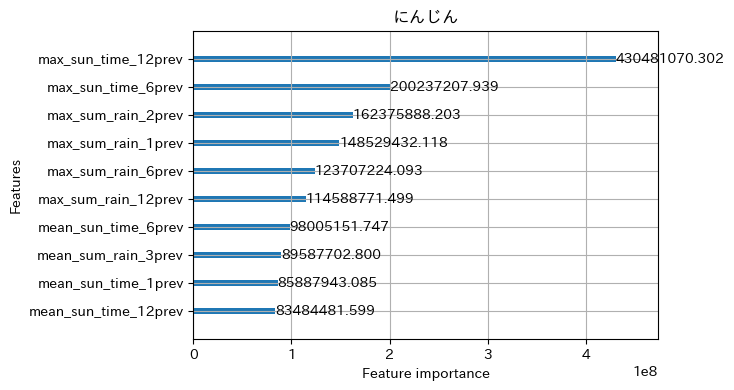

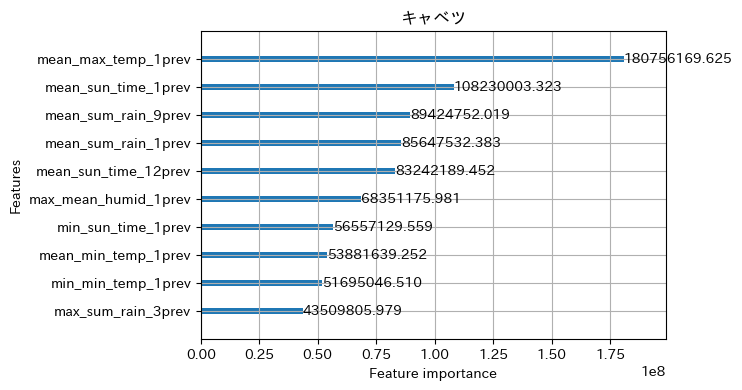

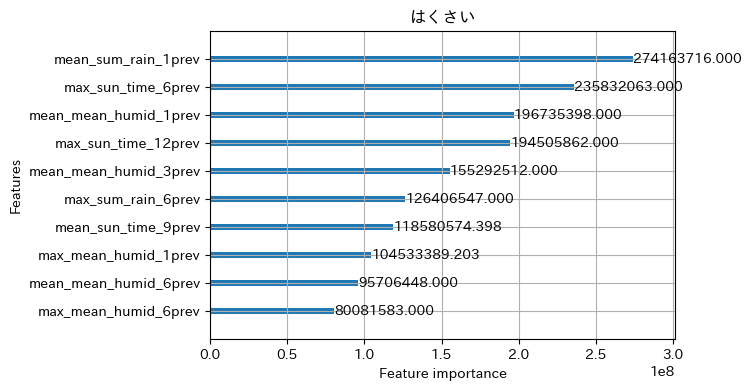

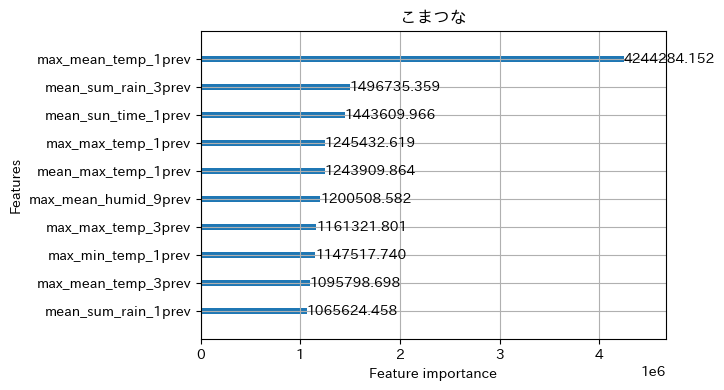

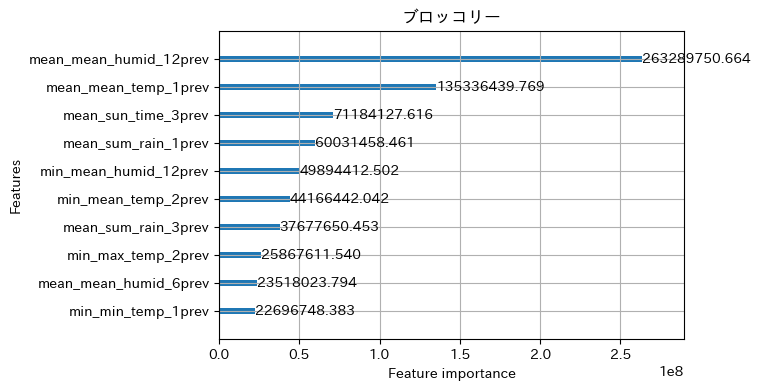

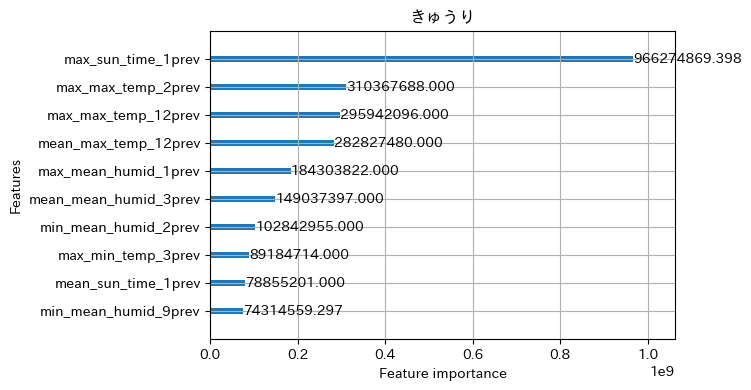

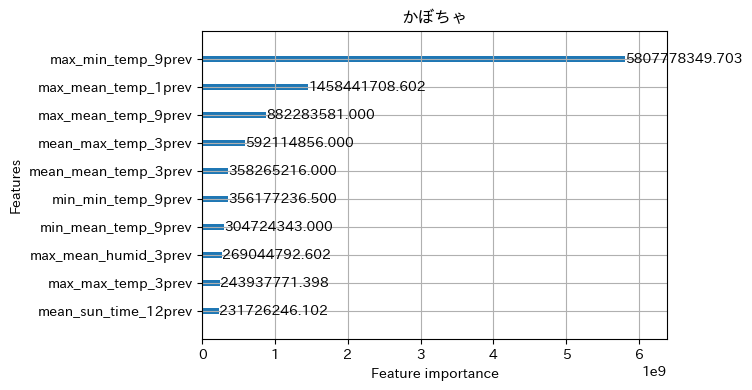

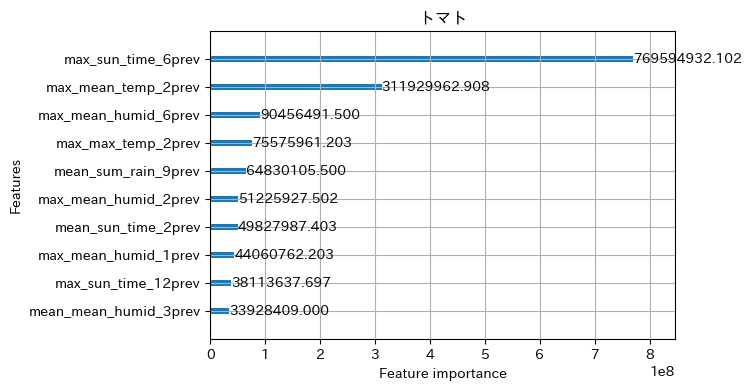

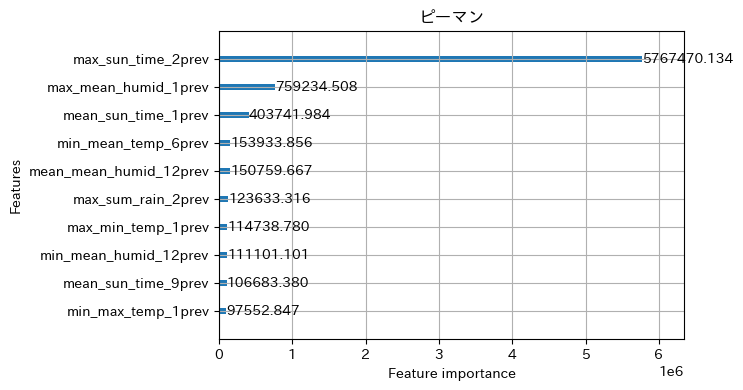

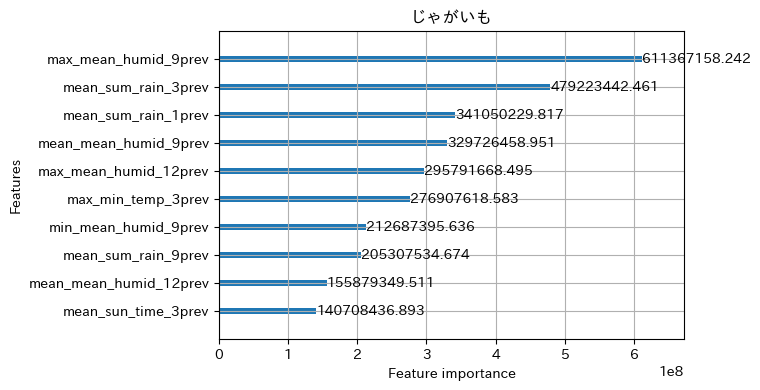

In [23]:
for kind in test_kinds:
    model = model_dict[kind]
    lgb.plot_importance(model, figsize=(6,4), max_num_features=10, importance_type='gain', title=kind)
plt.show()
plt.close()

# 提出ファイル作成

In [24]:
sub[['kind','date','mode_price']].to_csv('submission.csv', index=False)